# Simplified

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display_html
%matplotlib inline

In [2]:
#cleaner code to convert string columns to floats
def cleaner(x):
    return float(re.sub('%', '', x))

In [3]:
#import the data from default here
default_1 = pd.read_csv('16 jun 21/watchlist-icm-intraday-06-16-2021.csv', index_col = 'Symbol')
default_2 = pd.read_csv('16 jun 21/watchlist-icm2-intraday-06-16-2021.csv', index_col = 'Symbol')
default = default_1.append(default_2)
#default.head()

In [4]:
#clean the '%Chg' column
default['%Chg'] = default['%Chg'].map(lambda x: str(x))
default['%Chg'] = default['%Chg'].map(cleaner)
default.head()

,Name,Last,%Chg,Volume,1M Avg Vol,Market Cap
Symbol,,,,,,
PEI,Pennsylvania Real Estate Investment,2.67,-1.11,860868.0,3144293.0,2.140020e+08
CAN,Canaan Inc ADR,9.66,-2.62,4356764.0,9468839.0,1.568828e+09
CLDR,Cloudera Inc,15.77,0.00,4866407.0,8299183.0,4.608231e+09
QFIN,360 Finance Inc ADR,41.44,-3.34,3154289.0,4192302.0,6.525971e+09
PRTK,Paratek Pharma Inc,9.10,-11.05,1519189.0,638567.0,4.800730e+08


In [5]:
#import the data from pre here
pre_1 = pd.read_csv('16 jun 21/watchlist-icm-intraday-06-16-2021 (1).csv', index_col = 'Symbol')
pre_2 = pd.read_csv('16 jun 21/watchlist-icm2-intraday-06-16-2021 (1).csv', index_col = 'Symbol')
pre = pre_1.append(pre_2)
#pre.head()

In [6]:
#fix an error with the %Chg (Ext) column
def fix_this(x):
    if x == '-':
        x = '0%'
    else:
        x = x
    return x

In [7]:
# convert every object in the %Chg Ext column into a num + str
pre['%Chg (Ext)'] = pre['%Chg (Ext)'].map(fix_this)

In [8]:
#clean the '%Chg (Ext)' column
pre['%Chg (Ext)'] = pre['%Chg (Ext)'].map(lambda x: str(x))
pre['%Chg (Ext)'] = pre['%Chg (Ext)'].map(cleaner)
pre.head()

,Name,Last,%Chg,Volume,1M Avg Vol,Market Cap,Last (Ext),Change (Ext),%Chg (Ext),Time (Ext),Change,Time
Symbol,,,,,,,,,,,,
PEI,Pennsylvania Real Estate Investment,2.67,-1.11%,863195.0,3144293.0,2.140020e+08,NaN,NaN,NaN,NaN,NaN,NaN
CAN,Canaan Inc ADR,9.66,-2.62%,4365731.0,9468839.0,1.568828e+09,NaN,NaN,NaN,NaN,NaN,NaN
CLDR,Cloudera Inc,15.77,-0.03%,4876829.0,8299183.0,4.608231e+09,NaN,NaN,NaN,NaN,NaN,NaN
QFIN,360 Finance Inc ADR,41.50,-3.20%,3159631.0,4192302.0,6.525971e+09,NaN,NaN,NaN,NaN,NaN,NaN
PRTK,Paratek Pharma Inc,9.10,-11.05%,1519781.0,638567.0,4.800730e+08,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#join the 2 dataframes here
main_df = default.join(pre['%Chg (Ext)'])
type(main_df.iloc[0, 1])
main_df.head()
type(main_df.iloc[0, 1])

numpy.float64

In [10]:
#calculate relevant columns in main
main_df['Volume Change %'] = ((main_df.Volume/main_df['1M Avg Vol'])-1)*100
#main_df['Market Cap'] = main_df['Market Cap']*1000
main_df = main_df.loc[(main_df['Market Cap'] > float(10000000000)) | (main_df['Last'] > float(50))]
len(main_df.index)
main_df.head()

,Name,Last,%Chg,Volume,1M Avg Vol,Market Cap,%Chg (Ext),Volume Change %
Symbol,,,,,,,,
A,Agilent Technologies,143.71,-0.63,1061344.0,1412416.0,4.388392e+10,0.00,-24.856133
AAL,American Airlines Gp,22.88,0.39,16966171.0,31140848.0,1.461712e+10,NaN,-45.517954
AAP,Advance Auto Parts Inc,197.80,-1.43,562831.0,1022832.0,1.313099e+10,NaN,-44.973270
AAPL,Apple Inc,129.99,0.27,67402856.0,70997188.0,2.163384e+12,0.58,-5.062640
AAXJ,All Country Asia Ex Japan Ishares MSCI ETF,93.15,-0.89,491291.0,803598.0,6.731116e+09,0.00,-38.863586


In [11]:
#define funtions here
def pre_movers(x):
    pre = x.sort_values(by='%Chg (Ext)', ascending = False)
    pre = pre[['Name', 'Last', '%Chg (Ext)', '%Chg']]
    pre_ = pre.iloc[:50, :]
    return pre_

def most_active(x):
    most = x.sort_values(by='Volume Change %', ascending = False)
    most = most[['Name', 'Last', 'Volume Change %']]
    most_ = most.loc[most['Volume Change %'] > 0].iloc[:30, :]
    return most_

def performers(x):
    perf = x.sort_values(by='%Chg', ascending = False)
    perf = perf[['Name', 'Last', '%Chg', '%Chg (Ext)', 'Volume Change %']]
    perf_ = perf.iloc[:30, :]
    return perf_

In [12]:
#call the functions here
pre_market_movers = pre_movers(main_df)
most_active_stocks = most_active(main_df)
high_performers = performers(main_df)
#most_active_stocks.head()

In [13]:
# add colour to the dataframes
cm = sns.light_palette('green', as_cmap=True)
pre = pre_market_movers.style.background_gradient(cmap=cm)
perf = high_performers.style.background_gradient(cmap=cm)
active = most_active_stocks.style.background_gradient(cmap=cm)

In [14]:
# display the dataframes side by side
df1 = pre.set_table_attributes("style='display:inline'").set_caption('Pre Market Movers').set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('font-weight', 'bold')]}])
df2 = perf.set_table_attributes("style='display:inline'").set_caption('Top Performers').set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('font-weight', 'bold')]}])
df3 = active.set_table_attributes("style='display:inline'").set_caption('Most Active').set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('font-weight', 'bold')]}])
display_html(df1._repr_html_()+df2._repr_html_()+df3._repr_html_(), raw=True)

,Name,Last,%Chg (Ext),%Chg
Symbol,,,,
ELAN,Elanco Animal Health Inc,36.140000,1.900000,3.820000
ERIC,Ericsson ADR,13.000000,1.310000,0.540000
YNDX,Yandex N.V.,68.490000,1.290000,0.590000
EVRG,Evergy Inc,64.250000,1.210000,-0.420000
ETSY,Etsy Inc,167.870000,1.020000,1.090000
TCOM,Trip.com Group Ltd,37.410000,1.000000,0.890000
TJX,TJX Companies,65.310000,0.890000,-0.140000
ENTG,Entegris Inc,120.340000,0.870000,0.560000
CLX,Clorox Company,174.830000,0.850000,0.750000


In [15]:
print(pre_market_movers.index)
print(most_active_stocks.index)
print(high_performers.index)

Index(['ELAN', 'ERIC', 'YNDX', 'EVRG', 'ETSY', 'TCOM', 'TJX', 'ENTG', 'CLX',
       'IPGP', 'TER', 'NEE', 'NFLX', 'INFY', 'CVAC', 'TXN', 'CNC', 'MRK',
       'MRVL', 'ETR', 'REGN', 'LULU', 'ZS', 'CMCSA', 'DBX', 'JBL', 'HMC',
       'PKI', 'AAPL', 'AMGN', 'DUK', 'APO', 'QCOM', 'DHI', 'TFC', 'WM', 'NVS',
       'BRKR', 'NXPI', 'CHD', 'KDP', 'AEP', 'TWTR', 'SMTC', 'CG', 'OKTA', 'ZI',
       'ERIE', 'JKHY', 'SBUX'],
      dtype='object', name='Symbol')
Index(['SAGE', 'ORCL', 'C', 'ZI', 'CBRL', 'AMED', 'CNC', 'NTRS', 'BK', 'NVAX',
       'SNA', 'ZNGA', 'BAM', 'XLU', 'TAL', 'ASAN', 'ZG', 'LQD', 'GM', 'DEO',
       'ATHM', 'DLR', 'TTWO', 'OXY', 'NTLA', 'EQNR', 'BRKR', 'JPM', 'IEF',
       'ARE'],
      dtype='object', name='Symbol')
Index(['ZI', 'SBNY', 'ASAN', 'ENPH', 'MDB', 'APPN', 'EGLE', 'OXY', 'CHWY',
       'SHOP', 'CNC', 'ELAN', 'RVLV', 'SEDG', 'HUBS', 'DISH', 'STT', 'SIVB',
       'ZS', 'CMA', 'UTHR', 'DDOG', 'NCLH', 'CVNA', 'PLCE', 'NEWR', 'TNDM',
       'OSH', 'AVTR', 'BK'],
      d

## Extras

In [16]:
# confluence factor dataframes
pre_top = pre_market_movers.loc[pre_market_movers.index & high_performers.index]
top_act = high_performers.loc[high_performers.index & most_active_stocks.index]
act_pre = most_active_stocks.loc[most_active_stocks.index & pre_market_movers.index]

In [17]:
# add colour
cm = sns.light_palette('red', as_cmap=True)
pre2 = pre_top.style.background_gradient(cmap=cm)
perf2 = top_act.style.background_gradient(cmap=cm)
active2 = act_pre.style.background_gradient(cmap=cm)

In [18]:
# styling and side by side display
df11 = pre2.set_table_attributes("style='display:inline'").set_caption('Pre Market Movers x Top Performers').set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('font-weight', 'bold')]}])
df22 = perf2.set_table_attributes("style='display:inline'").set_caption('Top Performers x Most Active').set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('font-weight', 'bold')]}])
df33 = active2.set_table_attributes("style='display:inline'").set_caption('Most Active x Pre Market Movers').set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('font-weight', 'bold')]}])
display_html(df11._repr_html_()+df22._repr_html_()+df33._repr_html_(), raw=True)

Pre Market Movers x Top Performers Name Last %Chg (Ext) %Chg Symbol 
 
 ELAN 
 Elanco Animal Health Inc 
 36.140000 
 1.900000 
 3.820000 
 
 
 CNC 
 Centene Corp 
 72.700000 
 0.710000 
 3.860000 
 
 
 ZS 
 Zscaler Inc 
 213.310000 
 0.690000 
 2.850000 
 
 
 ZI 
 Zoominfo Technologies Inc Cl A 
 48.530000 
 0.440000 
 7.840000 
 
 Top Performers x Most Active Name Last %Chg %Chg (Ext) Volume Change % Symbol 
 
 ZI 
 Zoominfo Technologies Inc Cl A 
 48.530000 
 7.840000 
 0.440000 
 128.919268 
 
 
 ASAN 
 Asana Inc Cl A 
 50.230000 
 7.280000 
 nan 
 68.640873 
 
 
 OXY 
 Occidental Petroleum Corp 
 30.450000 
 4.280000 
 nan 
 61.716845 
 
 
 CNC 
 Centene Corp 
 72.700000 
 3.860000 
 0.710000 
 98.035761 
 
 
 BK 
 Bank of New York Mellon Corp 
 51.740000 
 2.560000 
 nan 
 84.855956 
 
 Most Active x Pre Market Movers Name Last Volume Change % Symbol 
 
 ZI 
 Zoominfo Technologies Inc Cl A 
 48.530000 
 128.919268 
 
 
 CNC 
 Centene Corp 
 72.700000 
 98.035761 
 
 
 BRKR 
 Bruker Corp 
 74.300000 
 58.367301

In [19]:
# import unusual options data
unusual_options = pd.read_csv('16 jun 21/koyfin_ICM Equities_2021.05.31_10.52.36.538.csv', index_col='Symbol')
unusual_options['Calls %'] = (unusual_options['Call Volume']/unusual_options['Options Vol'])*100

In [20]:
# update the main df
main_df2 = main_df.join(unusual_options['Calls %'])
main_df2.fillna(0, inplace=True)
#main_df2.head()

In [21]:
# redefine some functions
def performers2(x):
    perf = x.sort_values(by='%Chg', ascending = False)
    perf = perf[['Name', 'Last', '%Chg', 'Calls %']]
    return perf.iloc[:50, :]

def pre_movers2(x):
    pre = x.sort_values(by='%Chg (Ext)', ascending = False)
    pre = pre[['Name', 'Last', '%Chg (Ext)', 'Calls %']]
    return pre.iloc[:50, :]

In [22]:
# call the new functions
pre_market = pre_movers2(main_df2)
high_perf = performers2(main_df2)

In [23]:
# find mew confluence factors
unusual_pre = pre_market.loc[pre_market.index & unusual_options.index]
unusual_perf = high_perf.loc[high_perf.index & unusual_options.index]
#unusual_perf.head()

In [24]:
#add colour
cm = sns.light_palette('purple', as_cmap=True)
pre_un = unusual_pre.style.background_gradient(cmap=cm)
perf_un = unusual_perf.style.background_gradient(cmap=cm)

In [25]:
# print the dfs
df_un_pre = pre_un.set_table_attributes("style='display:inline'").set_caption('Unusual Options Activity X Pre-market Movers').set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('font-weight', 'bold')]}])
df_un_perf = perf_un.set_table_attributes("style='display:inline'").set_caption('Unusual Options Acivity X Top Performers').set_table_styles([{
    'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('font-weight', 'bold')]}])

display_html(df_un_pre._repr_html_()+df_un_perf._repr_html_(), raw=True)

,Name,Last,%Chg (Ext),Calls %
Symbol,,,,
ELAN,Elanco Animal Health Inc,36.140000,1.900000,86.984816
ETSY,Etsy Inc,167.870000,1.020000,55.639151
CLX,Clorox Company,174.830000,0.850000,36.925926
NEE,Nextera Energy,73.340000,0.780000,75.470647
NFLX,Netflix Inc,492.280000,0.770000,64.813850
CVAC,Curevac N.V.,94.790000,0.740000,34.673716
MRK,Merck & Company,77.100000,0.710000,64.342745
MRVL,Marvell Technology Inc,54.100000,0.710000,62.072515
CNC,Centene Corp,72.700000,0.710000,87.320846


In [26]:
unusual_pre.index
unusual_perf.index

Index(['ZI', 'ASAN', 'ENPH', 'MDB', 'OXY', 'CHWY', 'SHOP', 'CNC', 'ELAN',
       'DISH', 'ZS', 'DDOG', 'NCLH', 'CVNA', 'AVTR', 'BK', 'LB', 'SCHW',
       'DASH', 'CCL', 'GNRC', 'CRWD', 'EAT'],
      dtype='object', name='Symbol')

In [27]:
print('the top ten performers pre-market with options volume are {}'.format(list(unusual_pre.index)))

the top ten performers pre-market with options volume are ['ELAN', 'ETSY', 'CLX', 'NEE', 'NFLX', 'CVAC', 'MRK', 'MRVL', 'CNC', 'LULU', 'ZS', 'CMCSA', 'DBX', 'AAPL', 'AMGN', 'DHI', 'QCOM', 'TWTR', 'OKTA', 'ZI']


In [28]:
type(unusual_pre)

pandas.core.frame.DataFrame

In [29]:
unusual_pre.to_excel('unusual_pre.xlsx')

<AxesSubplot:xlabel='Symbol'>

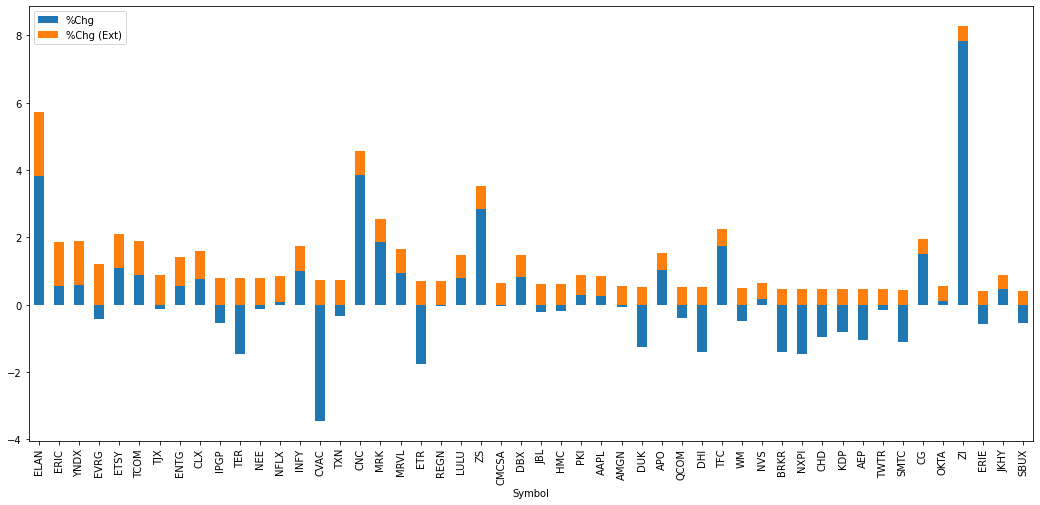

In [51]:
pre_market_movers[['%Chg', '%Chg (Ext)']].plot.bar(stacked=True, figsize=(18,8))